# Data Science Lab: Lab 5

Submit:
1. A pdf of your notebook with solutions.
2. A link to your colab notebook or also upload your .ipynb if not working on colab.

# Goals of this Lab

1. Random Forests
2. Boosting
3. Playing with Ensembling packages, including XGBoost and CatBoost
4. One more time: Revisiting CIFAR-10 and MNIST
5. Getting ready for Kaggle

We will soon open a Kaggle competition made for this class. In that one, you will be participating on your own. This is an intro to get us started, and also an excuse to work with regularization and regression which we have been discussing. You'll revisit some problems from earlier labs, this time using Random Forests, and Boosting. In particular, you should take this opportunity to become familiar with some very useful packages for boosting. I recommend not only the boosting packages in scikit-learn, but also XGBoost, GBM Light, CatBoost and possibly others. You have to download these and get them running, and then read their documentation to figure out how they work, what the hyperparameters are, etc.

Also, the metric we will use in the Kaggle competition is AUC. We will discuss this. In the meantime, you may want to understand how it works. At least one key thing to remember: to get a good AUC score, you need to submit a soft score (probabilities) and not rounded values (i.e., not 0s and 1s).


In [ ]:
!pip install joblib
!pip install --upgrade scikit-learn joblib
!pip install -U scikit-learn
!pip install pandas
!pip install matplotlib
!pip install xgboost


[notice] A new release of pip is available: 23.1.2 -> 24.0
[notice] To update, run: python3.11 -m pip install --upgrade pip

[notice] A new release of pip is available: 23.1.2 -> 24.0
[notice] To update, run: python3.11 -m pip install --upgrade pip

[notice] A new release of pip is available: 23.1.2 -> 24.0
[notice] To update, run: python3.11 -m pip install --upgrade pip

[notice] A new release of pip is available: 23.1.2 -> 24.0
[notice] To update, run: python3.11 -m pip install --upgrade pip

[notice] A new release of pip is available: 23.1.2 -> 24.0
[notice] To update, run: python3.11 -m pip install --upgrade pip

[notice] A new release of pip is available: 23.1.2 -> 24.0
[notice] To update, run: python3.11 -m pip install --upgrade pip


## Problem 1: Revisiting Logistic Regression and MNIST

We have played with the handwriting recognition problem (the MNIST data set) using decision trees. We have also considered the same problem using multi-class Logistic Regression in a previous Lab. We revisit this one more time.

**Part 1**: Use Random Forests to try to get the best possible *test accuracy* on MNIST. This involves getting acquainted with how Random Forests work, understanding their parameters, and therefore using Cross Validation to find the best settings. How well can you do? You should use the accuracy metric, since this is what you used in the previous Lab  -- therefore this will allow you to compare your results from Random Forests with your results from L1- and L2- Regularized Logistic Regression.

What are the hyperparameters of your best model?

**Part 2**: Use Boosting to do the same. Take the time to understand how XGBoost works (and/or other boosting packages available -- CatBoost is also another favorite). Try your best to tune your hyper-parameters. As added motivation: typically the winners and near-winners of the Kaggle competition are those that are best able to tune and cross validate XGBoost. What are the hyperparameters of your best model?


## PART 1

In [10]:


from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import sklearn

# Step 1: Import necessary libraries

# Step 2: Load the MNIST dataset
mnist = fetch_openml('mnist_784')


In [ ]:
# Rescale the pixel values to the range [0, 1]
X = mnist.data.values
y = mnist.target

# Step 4: Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Define a pipeline with preprocessing and RandomForestClassifier
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('rf', RandomForestClassifier())
])


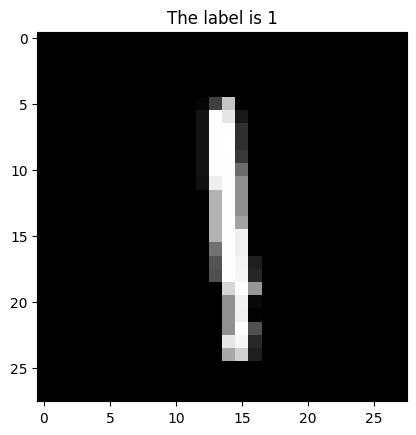

In [ ]:

import matplotlib.pyplot as plt

index = 8
img = X[index]
label = y.to_numpy()[index]
img = img.reshape((28, 28))

# Plot it along with its label
plt.title('The label is {label}'.format(label=label))
plt.imshow(img, cmap='gray')
plt.show()

In [ ]:

# Step 5: Define a Random Forest model
rf_model = RandomForestClassifier()
# print(sklearn.metrics.get_scorer_names())

# Step 6: Define hyperparameters to tune
param_grid = {
    # 'rf__n_estimators': [100,300,500] # Test Accuracy: 0.9674857142857143 Best Hyperparameters: {'rf__n_estimators': 500} time:14 mins
    # 'rf__max_depth': [None, 20,40], #Test Accuracy: 0.98 Best Hyperparameters: {'rf__max_depth': None} time:14 mins
    # 'rf__min_samples_split': [2, 5, 10], # Test Accuracy: 0.9742857142857143 Best Hyperparameters: {'rf__min_samples_split': 2} Time: 7mins
    # 'rf__min_samples_leaf': [1, 2, 4] #Test Accuracy: 0.9757142857142858 Best Hyperparameters: {'rf__min_samples_leaf': 1} Time: 7mins
    'rf__n_estimators':[500],
    'rf__max_depth': [None],
    'rf__min_samples_split':[2],
    'rf__min_samples_leaf':[1] # Test Accuracy: 0.9677714285714286 Best Hyperparameters: {'rf__max_depth': None, 'rf__min_samples_leaf': 1, 'rf__min_samples_split': 2, 'rf__n_estimators': 500} time: 9 mins
}

# Perform cross-validation with hyperparameter tuning using GridSearchCV
grid_search = GridSearchCV(estimator=pipeline, param_grid=param_grid, n_jobs=-1, cv=3,scoring='accuracy', verbose=3)
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 1 candidates, totalling 3 fits
[CV 3/3] END rf__max_depth=None, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=500;, score=0.966 total time= 1.9min
[CV 2/3] END rf__max_depth=None, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=500;, score=0.969 total time= 1.9min
[CV 1/3] END rf__max_depth=None, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=500;, score=0.968 total time= 1.9min


GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('rf', RandomForestClassifier())]),
             n_jobs=-1,
             param_grid={'rf__max_depth': [None], 'rf__min_samples_leaf': [1],
                         'rf__min_samples_split': [2],
                         'rf__n_estimators': [500]},
             scoring='accuracy', verbose=3)

In [ ]:
# Step 8: Evaluate the model
best_rf_model = grid_search.best_estimator_
y_pred = best_rf_model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy:", test_accuracy)
print("Best Hyperparameters:", grid_search.best_params_)

Test Accuracy: 0.9685142857142857
Best Hyperparameters: {'rf__max_depth': None, 'rf__min_samples_leaf': 1, 'rf__min_samples_split': 2, 'rf__n_estimators': 500}


In [ ]:
display(grid_search.cv_results_)

{'mean_fit_time': array([112.02396067]),
 'std_fit_time': array([0.04063889]),
 'mean_score_time': array([4.59791835]),
 'std_score_time': array([0.02894322]),
 'param_rf__max_depth': masked_array(data=[None],
              mask=[False],
        fill_value='?',
             dtype=object),
 'param_rf__min_samples_leaf': masked_array(data=[1],
              mask=[False],
        fill_value='?',
             dtype=object),
 'param_rf__min_samples_split': masked_array(data=[2],
              mask=[False],
        fill_value='?',
             dtype=object),
 'param_rf__n_estimators': masked_array(data=[500],
              mask=[False],
        fill_value='?',
             dtype=object),
 'params': [{'rf__max_depth': None,
   'rf__min_samples_leaf': 1,
   'rf__min_samples_split': 2,
   'rf__n_estimators': 500}],
 'split0_test_score': array([0.9676]),
 'split1_test_score': array([0.96868571]),
 'split2_test_score': array([0.96594286]),
 'mean_test_score': array([0.96740952]),
 'std_test_score

## PART 2

In [12]:
import xgboost as xgb
from scipy.stats import uniform, randint
from sklearn.model_selection import RandomizedSearchCV


# Step 4: Define an XGBoost model
xgb_model = xgb.XGBClassifier(objective='multi:softmax', num_class=10, eval_metric='mlogloss')

# Step 5: Define hyperparameters to tune
param_dist = {
    'n_estimators': randint(100, 1000),
    'max_depth': randint(3, 10),
    'learning_rate': uniform(0.01, 0.3),
    'subsample': uniform(0.5, 0.5),
    'colsample_bytree': uniform(0.5, 0.5),
    'gamma': uniform(0, 0.5),
    'min_child_weight': randint(1, 10)
}





In [ ]:
# Perform Randomized Search with cross-validation
random_search = RandomizedSearchCV(estimator=xgb_model, param_distributions=param_dist, n_iter=4, cv=3, scoring='accuracy', verbose=3, random_state=42, n_jobs=-1)
random_search.fit(X_train, y_train.astype(int))
#Test Accuracy: 0.9770285714285715
#Best Hyperparameters: {'colsample_bytree': 0.5035331526098588, 'gamma': 0.011531212520707879, 'learning_rate': 0.16743239807751675, 'max_depth': 9, 'min_child_weight': 3, 'n_estimators': 975, 'subsample': 0.7571172192068059}

Fitting 3 folds for each of 4 candidates, totalling 12 fits


[CV 1/3] END colsample_bytree=0.5499874579090014, gamma=0.22962444598293358, learning_rate=0.11011258334170654, max_depth=5, min_child_weight=6, n_estimators=408, subsample=0.9849549260809971;, score=0.972 total time=24.4min
[CV 3/3] END colsample_bytree=0.5499874579090014, gamma=0.22962444598293358, learning_rate=0.11011258334170654, max_depth=5, min_child_weight=6, n_estimators=408, subsample=0.9849549260809971;, score=0.972 total time=24.4min
[CV 2/3] END colsample_bytree=0.5499874579090014, gamma=0.22962444598293358, learning_rate=0.11011258334170654, max_depth=5, min_child_weight=6, n_estimators=408, subsample=0.9849549260809971;, score=0.973 total time=24.5min
[CV 2/3] END colsample_bytree=0.6872700594236812, gamma=0.4753571532049581, learning_rate=0.22959818254342154, max_depth=7, min_child_weight=5, n_estimators=714, subsample=0.7229163764267956;, score=0.970 total time=27.6min
[CV 3/3] END colsample_bytree=0.6872700594236812, gamma=0.4753571532049581, learning_rate=0.229598182

RandomizedSearchCV(cv=3,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric='mlogloss',
                                           feature_types=None, gamma=None,
                                           grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learnin...
                                        'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x13fd142d0>,
                                        'min_child_weight': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x13fe31c90>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x13fcc5190>,
                                        'subsample': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x13fc95350>},
                   random_state=42, scoring='accuracy', verbose=3)

In [ ]:
# Step 7: Evaluate the model
best_xgb_model = random_search.best_estimator_
y_pred = best_xgb_model.predict(X_test)
test_accuracy = accuracy_score(y_test.astype(int), y_pred)
print("Test Accuracy:", test_accuracy)
print("Best Hyperparameters:", random_search.best_params_)

Test Accuracy: 0.9770285714285715
Best Hyperparameters: {'colsample_bytree': 0.5035331526098588, 'gamma': 0.011531212520707879, 'learning_rate': 0.16743239807751675, 'max_depth': 9, 'min_child_weight': 3, 'n_estimators': 975, 'subsample': 0.7571172192068059}


In [ ]:
display(random_search.cv_results_)

{'mean_fit_time': array([1658.82534107, 1463.35710653, 1999.1457653 , 2325.00224694]),
 'std_fit_time': array([1.0091916 , 1.34428275, 1.41355983, 3.33424671]),
 'mean_score_time': array([1.25033832, 2.66439064, 2.28160938, 2.70222576]),
 'std_score_time': array([0.10072616, 0.21113674, 0.02685021, 0.02364427]),
 'param_colsample_bytree': masked_array(data=[0.6872700594236812, 0.5499874579090014,
                    0.9162213204002109, 0.5035331526098588],
              mask=[False, False, False, False],
        fill_value='?',
             dtype=object),
 'param_gamma': masked_array(data=[0.4753571532049581, 0.22962444598293358,
                    0.10616955533913808, 0.011531212520707879],
              mask=[False, False, False, False],
        fill_value='?',
             dtype=object),
 'param_learning_rate': masked_array(data=[0.22959818254342154, 0.11011258334170654,
                    0.06454749016213018, 0.16743239807751675],
              mask=[False, False, False, False],


## Problem 2: Revisiting Logistic Regression and CIFAR-10

Now that you have your pipeline set up, it should be easy to apply the above procedure to CIFAR-10. If you did something that takes significant computation time, keep in mind that CIFAR-10 is a few times larger.

**Part 1**: What is the best accuracy you can get on the test data, by tuning Random Forests? What are the hyperparameters of your best model?

**Part 2**: What is the best accuracy you can get on the test data, by tuning XGBoost? What are the hyperparameters of your best model?

In [1]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import sklearn

cifar10 = fetch_openml('CIFAR_10', version=1)



In [2]:
# Rescale the pixel values to the range [0, 1]
X = cifar10.data.values
y = cifar10.target

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)


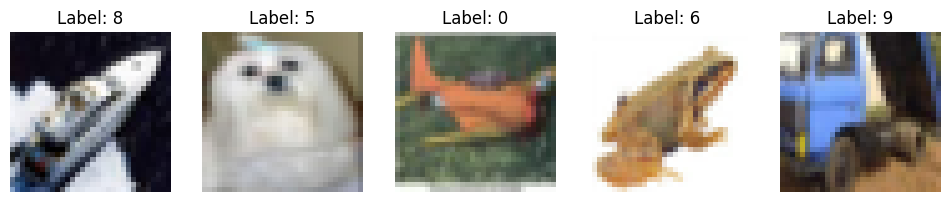

In [3]:

import numpy as np
import matplotlib.pyplot as plt

def display_images(images, labels, num_images=5):
    fig, axes = plt.subplots(1, num_images, figsize=(12, 6))
    for i in range(num_images):
        # Normalize the image data to [0, 1] range
        image = np.array(images[i]).reshape(3, 32, 32).transpose(1, 2, 0)
        # plt.figure(figsize=(2, 2))
        axes[i].imshow(image.astype('uint8'))
        axes[i].set_title(f"Label: {labels.iloc[i]}")
        axes[i].axis('off')
    plt.show()
# Displaying first 5 images with their labels
display_images(X, y)

In [4]:
# Step 5: Define a Random Forest model
rf_model = RandomForestClassifier()
# print(sklearn.metrics.get_scorer_names())
# Define a pipeline with preprocessing and RandomForestClassifier
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('rf', RandomForestClassifier())
])



# Step 6: Define hyperparameters to tune
param_grid = {
    # 'rf__n_estimators': [100,300,500],
    # 'rf__max_depth': [None,20,40],
    # 'rf__min_samples_split': [2, 5, 10],
    # 'rf__min_samples_leaf': [1, 2, 4]
    'rf__n_estimators':[500],
    'rf__max_depth': [None],
    'rf__min_samples_split':[2],
    'rf__min_samples_leaf':[1]
}

# Perform cross-validation with hyperparameter tuning using GridSearchCV
grid_search = GridSearchCV(estimator=pipeline, param_grid=param_grid, scoring='accuracy', cv=3, n_jobs=-1, verbose=3)
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 1 candidates, totalling 3 fits
[CV 1/3] END rf__max_depth=None, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=500;, score=0.472 total time=25.4min
[CV 3/3] END rf__max_depth=None, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=500;, score=0.478 total time=25.4min
[CV 2/3] END rf__max_depth=None, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=500;, score=0.469 total time=25.6min


GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('rf', RandomForestClassifier())]),
             n_jobs=-1,
             param_grid={'rf__max_depth': [None], 'rf__min_samples_leaf': [1],
                         'rf__min_samples_split': [2],
                         'rf__n_estimators': [500]},
             scoring='accuracy', verbose=3)

In [5]:
# Step 8: Evaluate the model
best_rf_model = grid_search.best_estimator_
y_pred = best_rf_model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy:", test_accuracy)
print("Best Hyperparameters:", grid_search.best_params_)

Test Accuracy: 0.4804
Best Hyperparameters: {'rf__max_depth': None, 'rf__min_samples_leaf': 1, 'rf__min_samples_split': 2, 'rf__n_estimators': 500}


In [6]:
import xgboost as xgb
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform, randint

# Step 4: Define an XGBoost model
xgb_model = xgb.XGBClassifier(objective='multi:softmax', num_class=10, eval_metric='mlogloss')

# Step 5: Define hyperparameters to tune
param_dist = {
    'n_estimators': randint(100, 1000),
    'max_depth': randint(3, 10),
    'learning_rate': uniform(0.01, 0.3),
    'subsample': uniform(0.5, 0.5),
    'colsample_bytree': uniform(0.5, 0.5),
    'gamma': uniform(0, 0.5),
    'min_child_weight': randint(1, 10)
    
    # do lesss 267
}


In [9]:
# Perform cross-validation with hyperparameter tuning
random_search = RandomizedSearchCV(estimator=xgb_model, param_distributions=param_dist, n_iter=3, cv=3, verbose=2, random_state=42, n_jobs=-1)
random_search.fit(X_train, y_train.astype(int))

Fitting 3 folds for each of 3 candidates, totalling 9 fits
[CV] END colsample_bytree=0.5499874579090014, gamma=0.22962444598293358, learning_rate=0.11011258334170654, max_depth=5, min_child_weight=6, n_estimators=408, subsample=0.9849549260809971; total time=151.3min
[CV] END colsample_bytree=0.5499874579090014, gamma=0.22962444598293358, learning_rate=0.11011258334170654, max_depth=5, min_child_weight=6, n_estimators=408, subsample=0.9849549260809971; total time=151.6min
[CV] END colsample_bytree=0.5499874579090014, gamma=0.22962444598293358, learning_rate=0.11011258334170654, max_depth=5, min_child_weight=6, n_estimators=408, subsample=0.9849549260809971; total time=151.7min
[CV] END colsample_bytree=0.6872700594236812, gamma=0.4753571532049581, learning_rate=0.22959818254342154, max_depth=7, min_child_weight=5, n_estimators=714, subsample=0.7229163764267956; total time=255.9min
[CV] END colsample_bytree=0.6872700594236812, gamma=0.4753571532049581, learning_rate=0.22959818254342154,

RandomizedSearchCV(cv=3,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric='mlogloss',
                                           feature_types=None, gamma=None,
                                           grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learnin...
                                        'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x13b53c9d0>,
                                        'min_child_weight': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x13b53e6d0>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x140815010>,
                                        'subsample': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x140b2b950>},
                   random_state=42, verbose=2)

In [10]:
# Step 7: Evaluate the model
best_xgb_model = random_search.best_estimator_
y_pred = best_xgb_model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy:", test_accuracy)
print("Best Hyperparameters:", random_search.best_params_)

Test Accuracy: 0.0
Best Hyperparameters: {'colsample_bytree': 0.9162213204002109, 'gamma': 0.10616955533913808, 'learning_rate': 0.06454749016213018, 'max_depth': 7, 'min_child_weight': 1, 'n_estimators': 559, 'subsample': 0.8058265802441404}


## Problem 3: Revisiting Kaggle

This is a continuation of Problem 2 from Lab 3. You already did some first steps there, including making a Kaggle account, and trying ridge and lasso linear regression. You also tried stacking.

**Part 1** (Nothing to hand in) Revisit Lab 3 and your answers there.

**Part 2**: Train a gradient boosting regression, e.g., using XGBoost. What score can you get just from a single XGB? (you will need to optimize over its parameters).

**Part 3**: Do your best to get a more accurate model. Try feature engineering and stacking many models. You are allowed to use any public tool in python. No non-python tools allowed.

**Part 4**: (Optional)  Read the Kaggle forums, tutorials and Kernels in this competition. This is an excellent way to learn. Include in your report if you find something in the forums you like, or if you made your own post or code post, especially if other Kagglers liked or used it afterwards.

**Other**: Be sure to read and learn the rules of Kaggle! No sharing of code or data outside the Kaggle forums. Every student should have their own individual Kaggle account and teams can be formed in the Kaggle submissions with your Lab partner. This is more important for live competitions of course.

In the real in-class Kaggle competition (which will be next), you will be graded based on your public score (include that in your report) and also on the creativity of your solution. In your report, due after the competition closes, you will explain what worked and what did not work. Many creative things will not work, but you will get partial credit for developing them. You can start thinking about this now.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

#preprocessing step

In [39]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import RobustScaler, StandardScaler, Normalizer, QuantileTransformer
from sklearn.preprocessing import RobustScaler, StandardScaler, QuantileTransformer
from sklearn.ensemble import StackingRegressor
from sklearn.linear_model import RidgeCV, LassoCV, Ridge
from sklearn.metrics import mean_squared_error
from xgboost import XGBRegressor
from sklearn.pipeline import make_pipeline
from scipy.stats import uniform, randint
from sklearn.model_selection import RandomizedSearchCV

from sklearn.model_selection import train_test_split
# Load the data
train = pd.read_csv("/Users/dkamboj6/Recitation/Data science lab/lab 5/train.csv")
test = pd.read_csv("/Users/dkamboj6/Recitation/Data science lab/lab 5/test.csv")
print("Full train dataset shape is {}".format(test.shape))
all_data = pd.concat((train.loc[:,'MSSubClass':'SaleCondition'],
                      test.loc[:,'MSSubClass':'SaleCondition']))

Full train dataset shape is (1459, 80)


In [40]:
from scipy.stats import skew
from scipy.stats.stats import pearsonr

#log transform the target:
train["SalePrice"] = np.log1p(train["SalePrice"])

#log transform skewed numeric features:
numeric_feats = all_data.dtypes[all_data.dtypes != "object"].index

skewed_feats = train[numeric_feats].apply(lambda x: skew(x.dropna())) #compute skewness
skewed_feats = skewed_feats[skewed_feats > 0.75]
skewed_feats = skewed_feats.index

all_data[skewed_feats] = np.log1p(all_data[skewed_feats])

display(all_data)

/var/folders/1b/1s1wkrq567qbcsjbr2nqkyw40000gn/T/ipykernel_20055/1190890996.py:2: DeprecationWarning: Please import `pearsonr` from the `scipy.stats` namespace; the `scipy.stats.stats` namespace is deprecated and will be removed in SciPy 2.0.0.
  from scipy.stats.stats import pearsonr


,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,4.110874,RL,4.189655,9.042040,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0.0,0.0,NaN,NaN,NaN,0.000000,2,2008,WD,Normal
1,3.044522,RL,4.394449,9.169623,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0.0,0.0,NaN,NaN,NaN,0.000000,5,2007,WD,Normal
2,4.110874,RL,4.234107,9.328212,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0.0,0.0,NaN,NaN,NaN,0.000000,9,2008,WD,Normal
3,4.262680,RL,4.110874,9.164401,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0.0,0.0,NaN,NaN,NaN,0.000000,2,2006,WD,Abnorml
4,4.110874,RL,4.442651,9.565284,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0.0,0.0,NaN,NaN,NaN,0.000000,12,2008,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,5.081404,RM,3.091042,7.568896,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0.0,0.0,NaN,NaN,NaN,0.000000,6,2006,WD,Normal
1455,5.081404,RM,3.091042,7.546974,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0.0,0.0,NaN,NaN,NaN,0.000000,4,2006,WD,Abnorml
1456,3.044522,RL,5.081404,9.903538,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0.0,0.0,NaN,NaN,NaN,0.000000,9,2006,WD,Abnorml
1457,4.454347,RL,4.143135,9.253591,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0.0,0.0,NaN,MnPrv,Shed,6.552508,7,2006,WD,Normal


In [41]:
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline

# commented out is one hot encoding

# # Define preprocessing pipeline for numerical and categorical features
# numeric_features = all_data.select_dtypes(include=['int64', 'float64']).columns
# categorical_features = all_data.select_dtypes(include=['object']).columns

# numeric_transformer = Pipeline(steps=[
#     ('imputer', SimpleImputer(strategy='median'))  # Use median imputation for missing values
# ])

# categorical_transformer = Pipeline(steps=[
#     ('imputer', SimpleImputer(strategy='most_frequent')),  # Use most frequent imputation for missing values
#     ('encoder', OneHotEncoder(handle_unknown='ignore'))  # One-hot encode categorical variables
# ])

# preprocessor = ColumnTransformer(
#     transformers=[
#         ('num', numeric_transformer, numeric_features),
#         ('cat', categorical_transformer, categorical_features)
#     ])

all_data = pd.get_dummies(all_data)
#filling NA's with the mean of the column: feature engineering
all_data = all_data.fillna(all_data.mean())
# all_data = preprocessor.fit_transform(all_data)

#creating matrices for sklearn:

X_train_orig = all_data[:train.shape[0]]
X_test = all_data[train.shape[0]:]
y = train.SalePrice


In [42]:
# Split the training data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train_orig, y, test_size=0.25, random_state=42)
display(all_data)

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,4.110874,4.189655,9.042040,7,5,2003,2003,5.283204,6.561031,0.0,...,False,False,False,True,False,False,False,False,True,False
1,3.044522,4.394449,9.169623,6,8,1976,1976,0.000000,6.886532,0.0,...,False,False,False,True,False,False,False,False,True,False
2,4.110874,4.234107,9.328212,7,5,2001,2002,5.093750,6.188264,0.0,...,False,False,False,True,False,False,False,False,True,False
3,4.262680,4.110874,9.164401,7,5,1915,1970,0.000000,5.379897,0.0,...,False,False,False,True,True,False,False,False,False,False
4,4.110874,4.442651,9.565284,8,5,2000,2000,5.860786,6.486161,0.0,...,False,False,False,True,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,5.081404,3.091042,7.568896,4,7,1970,1970,0.000000,0.000000,0.0,...,False,False,False,True,False,False,False,False,True,False
1455,5.081404,3.091042,7.546974,4,5,1970,1970,0.000000,5.533389,0.0,...,False,False,False,True,True,False,False,False,False,False
1456,3.044522,5.081404,9.903538,5,7,1960,1996,0.000000,7.110696,0.0,...,False,False,False,True,True,False,False,False,False,False
1457,4.454347,4.143135,9.253591,5,5,1992,1992,0.000000,5.823046,0.0,...,False,False,False,True,False,False,False,False,True,False


In [43]:
# implement base model part 2
# Creating XGBoost regressor with specified parameters
xgb_reg_pt2 = XGBRegressor(n_estimators=500, learning_rate=0.05, max_depth=3,
                       subsample=0.5, colsample_bytree=0.7, gamma=0.1, random_state=42)


xgb_reg_pt2.fit(X_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.7, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=0.1, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.05, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=500, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [44]:

y_pred_pt2 = xgb_reg_pt2.predict(X_val)
rmse_pt2 = np.sqrt(mean_squared_error( y_val, y_pred_pt2))
print("RMSE for boosting:", rmse_pt2)

RMSE for boosting: 0.12523070322616173


## PART 3

In [56]:
# Define parameter grid for grid search over scalers

# Initialize stacking regressor with dummy parameters
# Define base models
base_models = [
    ('ridge', Ridge()),
    ('lasso', LassoCV())
]


# Initialize stacking regressor
stacking_reg = StackingRegressor(estimators=base_models, final_estimator=XGBRegressor(random_state=42))

# Initialize pipeline with RobustScaler
pipeline = Pipeline([
    ('scaler', RobustScaler()),
    ('regressor', stacking_reg)
])

# Define parameter grid for grid search over scalers
param_grid = {
    'regressor__ridge__alpha': [0.1, 1, 10],
    'regressor__lasso__n_alphas': [10, 50, 100],
    'regressor__final_estimator__n_estimators': [100, 500, 1000],
    'regressor__final_estimator__learning_rate': [0.01, 0.1,1],
    'regressor__final_estimator__max_depth': [3, 5,7],
}





In [96]:
# Initialize GridSearchCV
grid_search = GridSearchCV(pipeline, param_grid, cv=3, scoring='neg_root_mean_squared_error', n_jobs=-1)
# Fit GridSearchCV
grid_search.fit(X_train, y_train)


#Best parameters: {'regressor__final_estimator__learning_rate': 0.01, 'regressor__final_estimator__max_depth': 3, 'regressor__final_estimator__n_estimators': 500, 'regressor__lasso__n_alphas': 10, 'regressor__ridge__alphas': [0.1, 1.0, 10.0]}

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', RobustScaler()),
                                       ('regressor',
                                        StackingRegressor(estimators=[('ridge',
                                                                       Ridge()),
                                                                      ('lasso',
                                                                       LassoCV())],
                                                          final_estimator=XGBRegressor(base_score=None,
                                                                                       booster=None,
                                                                                       callbacks=None,
                                                                                       colsample_bylevel=None,
                                                                                       colsample_bynode=None,
                                                                                       colsample_bytree=None,
                                                                                       device=None,
                                                                                       early_stopping_rounds=None,
                                                                                       enable_categorical=...
                                                                                       num_parallel_tree=None,
                                                                                       random_state=42, ...)))]),
             n_jobs=-1,
             param_grid={'regressor__final_estimator__learning_rate': [0.01,
                                                                       0.1, 1],
                         'regressor__final_estimator__max_depth': [3, 5, 7],
                         'regressor__final_estimator__n_estimators': [100, 500,
                                                                      1000],
                         'regressor__lasso__n_alphas': [10, 50, 100],
                         'regressor__ridge__alpha': [0.1, 1, 10]},
             scoring='neg_root_mean_squared_error')

In [97]:


# Best parameters
print("Best parameters:", grid_search.best_params_)


best_stacking_reg = grid_search.best_estimator_
best_stacking_reg.fit(X_train, y_train)

Best parameters: {'regressor__final_estimator__learning_rate': 0.01, 'regressor__final_estimator__max_depth': 3, 'regressor__final_estimator__n_estimators': 500, 'regressor__lasso__n_alphas': 10, 'regressor__ridge__alpha': 1}


Pipeline(steps=[('scaler', RobustScaler()),
                ('regressor',
                 StackingRegressor(estimators=[('ridge', Ridge(alpha=1)),
                                               ('lasso', LassoCV(n_alphas=10))],
                                   final_estimator=XGBRegressor(base_score=None,
                                                                booster=None,
                                                                callbacks=None,
                                                                colsample_bylevel=None,
                                                                colsample_bynode=None,
                                                                colsample_bytree=None,
                                                                device=None,
                                                                early_stopping_rounds=None,
                                                                enable_categorical=False,
                                                                eval...
                                                                gamma=None,
                                                                grow_policy=None,
                                                                importance_type=None,
                                                                interaction_constraints=None,
                                                                learning_rate=0.01,
                                                                max_bin=None,
                                                                max_cat_threshold=None,
                                                                max_cat_to_onehot=None,
                                                                max_delta_step=None,
                                                                max_depth=3,
                                                                max_leaves=None,
                                                                min_child_weight=None,
                                                                missing=nan,
                                                                monotone_constraints=None,
                                                                multi_strategy=None,
                                                                n_estimators=500,
                                                                n_jobs=None,
                                                                num_parallel_tree=None,
                                                                random_state=42, ...)))])

In [98]:
# Predicting on test set
y_pred_stack = best_stacking_reg.predict(X_val)
rmse_stack = np.sqrt(mean_squared_error( y_val, y_pred_stack))
print("RMSE for Stacking Regressor:", rmse_stack)

RMSE for Stacking Regressor: 0.12966974938096862


In [99]:
# Define parameter distribution for random search
# use random search, one hot enconding, stack with ridge and lasso and rmse
# ask is data normally distributed
param_dist = {
    'n_estimators': randint(100, 1000),
    'max_depth': randint(3, 10),
    'learning_rate': uniform(0.01, 0.3),
    'subsample': uniform(0.5, 0.5),
    'colsample_bytree': uniform(0.5, 0.5),
    'gamma': uniform(0, 0.5),
    'min_child_weight': randint(1, 10)
}

# Instantiate XGBRegressor
xgb_reg = XGBRegressor(random_state=42)
random_search = RandomizedSearchCV(xgb_reg, param_distributions=param_dist, n_iter=100, cv=3, scoring='neg_root_mean_squared_error', random_state=42,n_jobs=-1)
random_search.fit(X_train, y_train)

# Best parameters for XGBoost: {'colsample_bytree': 0.8317508845540279, 'gamma': 0.0025307919231093434, 'learning_rate': 0.0582424154252496, 'max_depth': 4, 'min_child_weight': 2, 'n_estimators': 921, 'subsample': 0.7242120714931237}

RandomizedSearchCV(cv=5,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, device=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, feature_types=None,
                                          gamma=None, grow_policy=None,
                                          importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=...
                                        'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x146e0e6d0>,
                                        'min_child_weight': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x1471f2f90>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x146b724d0>,
                                        'subsample': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x146a0da90>},
                   random_state=42, scoring='neg_root_mean_squared_error')

In [108]:
# Best parameters for XGBoost
print("Best parameters for XGBoost:", random_search.best_params_)
# Best estimator for XGBoost
best_xgb_reg = random_search.best_estimator_


Best parameters for XGBoost: {'colsample_bytree': 0.6007031546066761, 'gamma': 0.004771676533613323, 'learning_rate': 0.032590430079540926, 'max_depth': 5, 'min_child_weight': 2, 'n_estimators': 805, 'subsample': 0.6715133562950122}


In [109]:
# Predicting on test set
y_pred_xgb = best_xgb_reg.predict(X_val)
rmse_xgb = np.sqrt(mean_squared_error(y_val, y_pred_xgb))
print("RMSE for XGBoost:", rmse_xgb)

RMSE for XGBoost: 0.12545167312928132


In [110]:
stacking_with_xgb = StackingRegressor(estimators=base_models, final_estimator=best_xgb_reg)
stacking_with_xgb.fit(X_train, y_train)



StackingRegressor(estimators=[('ridge', Ridge()), ('lasso', LassoCV())],
                  final_estimator=XGBRegressor(base_score=None, booster=None,
                                               callbacks=None,
                                               colsample_bylevel=None,
                                               colsample_bynode=None,
                                               colsample_bytree=0.6007031546066761,
                                               device=None,
                                               early_stopping_rounds=None,
                                               enable_categorical=False,
                                               eval_metric=None,
                                               feature_types=None,
                                               gamma=0.004771676533613323,
                                               grow_policy=None,
                                               importance_type=None,
                                               interaction_constraints=None,
                                               learning_rate=0.032590430079540926,
                                               max_bin=None,
                                               max_cat_threshold=None,
                                               max_cat_to_onehot=None,
                                               max_delta_step=None, max_depth=5,
                                               max_leaves=None,
                                               min_child_weight=2, missing=nan,
                                               monotone_constraints=None,
                                               multi_strategy=None,
                                               n_estimators=805, n_jobs=None,
                                               num_parallel_tree=None,
                                               random_state=42, ...))

In [111]:
# Predicting on test set using the combined stacking ensemble with XGBoost
y_pred_sxgb = stacking_with_xgb.predict(X_val)
rmse_sxgb = np.sqrt(mean_squared_error( y_val, y_pred_sxgb))
print("RMSE for Stacking with XGBoost:", rmse_sxgb)
print(y_val)

RMSE for Stacking with XGBoost: 0.14359873902701228
892     11.947956
1105    12.691584
413     11.652696
522     11.976666
1036    12.661917
          ...    
988     12.180760
243     11.695255
1342    12.339296
1057    12.421188
1418    11.728045
Name: SalePrice, Length: 365, dtype: float64


In [112]:
# # final testiung on the x_test # Predict on test set
# y_pred_test_stack = best_stacking_reg.predict(X_test)
# rmse_test_stack = np.sqrt(mean_squared_error(y, y_pred_test_stack))
# print("RMSE for Stacking Regressor on Test Set:", rmse_test_stack)

# # Predict on test set
# y_pred_test_xgb = best_xgb_reg.predict(X_test)
# rmse_test_xgb = np.sqrt(mean_squared_error(y, y_pred_test_xgb))
# print("RMSE for XGBoost on Test Set:", rmse_test_xgb)

# # Predict on test set using the combined stacking ensemble with XGBoost
# y_pred_test_sxgb = stacking_with_xgb.predict(X_test)
# rmse_test_sxgb = np.sqrt(mean_squared_error(y, y_pred_test_sxgb))
# print("RMSE for Stacking with XGBoost on Test Set:", rmse_test_sxgb)

In [122]:
test = pd.read_csv("/Users/dkamboj6/Recitation/Data science lab/lab 5/test.csv")
ids=test.pop('Id')
test=all_data[train.shape[0]:]
test=test.fillna(test.mean())
predictions_xgb = best_xgb_reg.predict(test)
# Make predictions using stacking_with_xgb
predictions_stack_xgb = stacking_with_xgb.predict(test)

# Make predictions using best_stacking_reg
predictions_stack = best_stacking_reg.predict(test)

# Create DataFrame for submission with 'Id' and predicted sale prices
submission_df = pd.DataFrame({
    'Id': ids,  # Assuming 'Id' column exists in the test dataset
    'SalePrice': np.expm1(predictions_stack_xgb.squeeze()),
    # 'SalePrice_stack_xgb': predictions_stack_xgb,
    # 'SalePrice_stack': predictions_stack
})


In [123]:
# Save the DataFrame as a CSV file
submission_df.to_csv('submission.csv', index=False)

# Display the first few rows of the submission DataFrame
print(submission_df.head())




     Id      SalePrice
0  1461  136756.687500
1  1462  144921.718750
2  1463  191570.859375
3  1464  191987.671875
4  1465  204704.218750


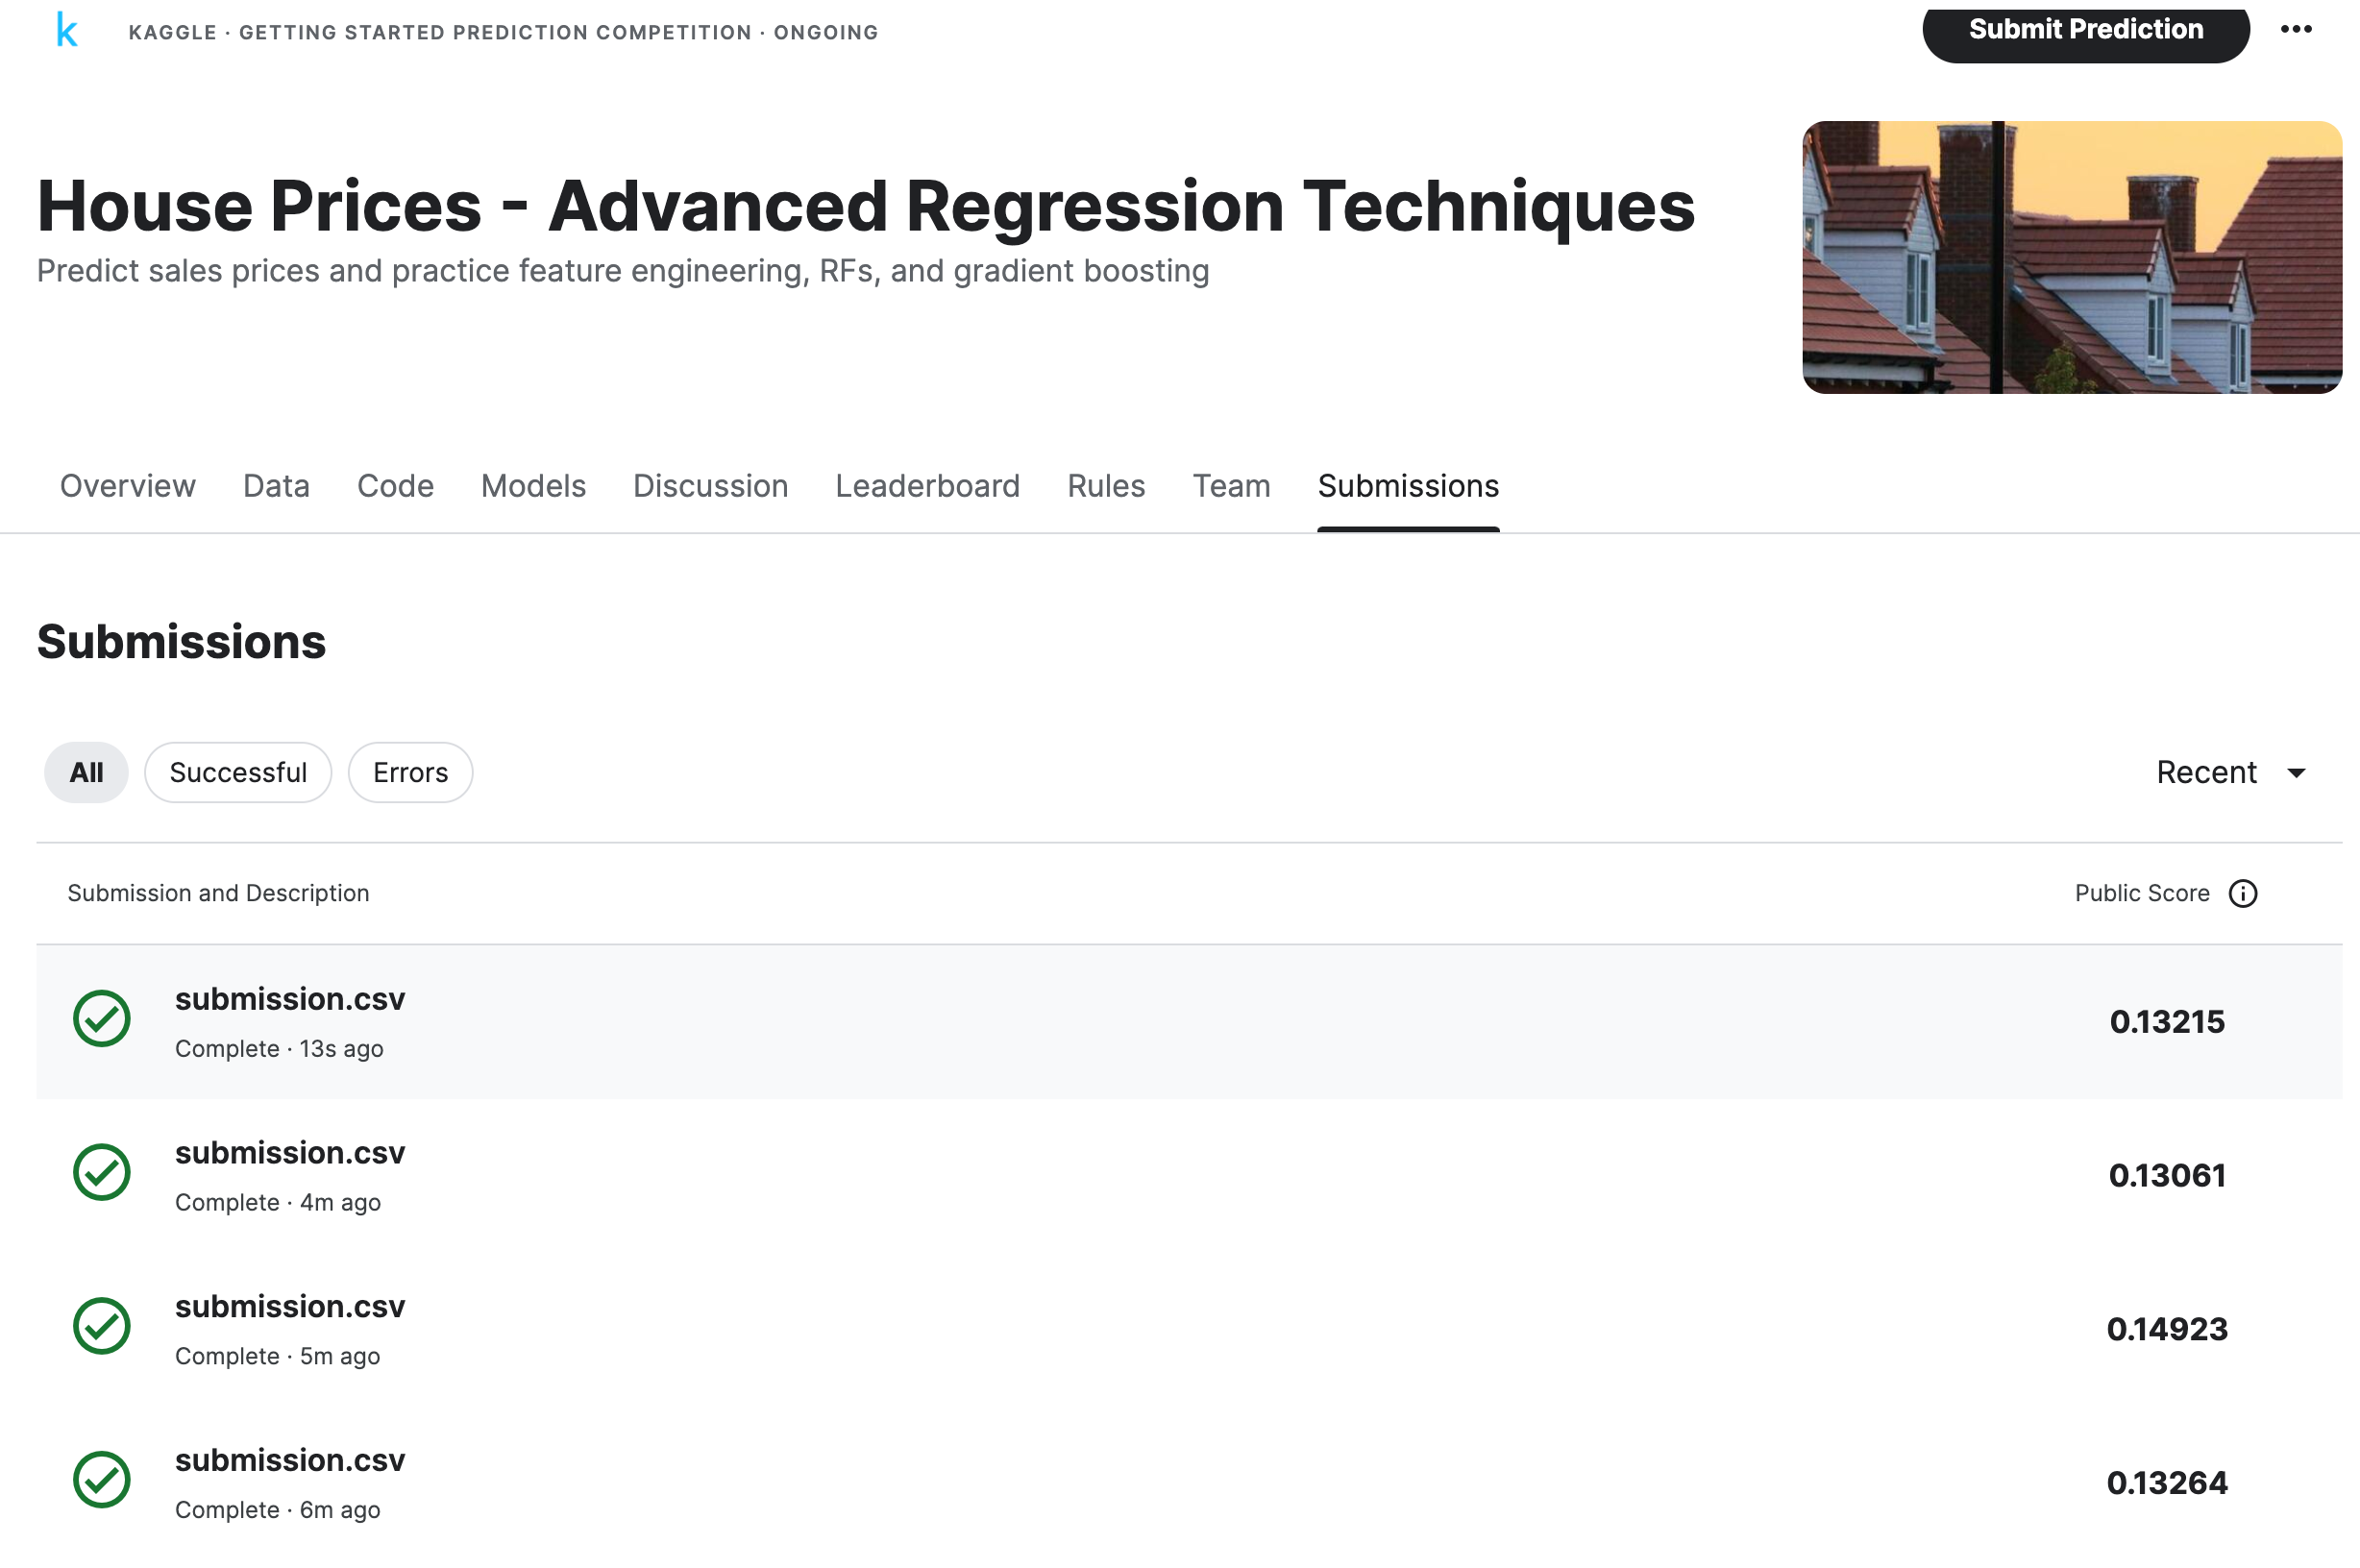
1st predictions_xgb = Score: 0.12964
2nd  predictions_stack_xgb = Score: 0.14923
3rd predictions_stack= Score: 0.13061
4th base_case_xgb_pt2= Score: 0.13215